<a href="https://colab.research.google.com/github/Rijan-Joshi/Fun-Learning/blob/main/Batch_Normalization_Visualized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

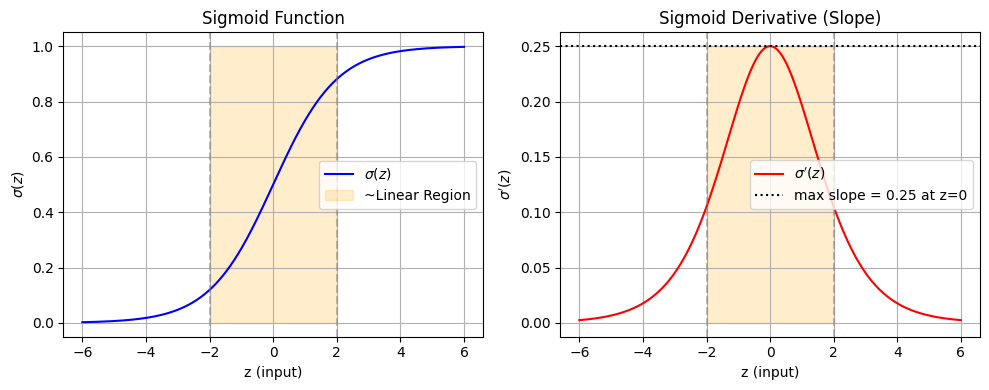

In [50]:
import numpy as np
import matplotlib.pyplot as plt


z = np.linspace(-6, 6, 400)
sigma = 1 / (1 + np.exp(-z))
grad = sigma * (1 - sigma)

plt.figure(figsize=(10, 4))

# Sigmoid
plt.subplot(1, 2, 1)
plt.plot(z, sigma, 'b', label=r'$\sigma(z)$')
plt.axvline(-2, color='gray', linestyle='--', alpha=0.5)
plt.axvline(2, color='gray', linestyle='--', alpha=0.5)
plt.fill_between(z, 0, 1, where=(z >= -2) & (z <= 2), color='orange', alpha=0.2, label='~Linear Region')
plt.title('Sigmoid Function')
plt.xlabel('z (input)')
plt.ylabel(r'$\sigma(z)$')
plt.legend()
plt.grid(True)

# Derivative (slope)
plt.subplot(1, 2, 2)
plt.plot(z, grad, 'r', label=r"$\sigma'(z)$")
plt.axhline(0.25, color='k', linestyle=':', label='max slope = 0.25 at z=0')
plt.axvline(-2, color='gray', linestyle='--', alpha=0.5)
plt.axvline(2, color='gray', linestyle='--', alpha=0.5)
plt.fill_between(z, 0, grad.max(), where=(z >= -2) & (z <= 2), color='orange', alpha=0.2)
plt.title('Sigmoid Derivative (Slope)')
plt.xlabel('z (input)')
plt.ylabel(r"$\sigma'(z)$")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2844196565.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
/tmp/ipython-input-2844196565.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
/tmp/ipython-input-2844196565.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


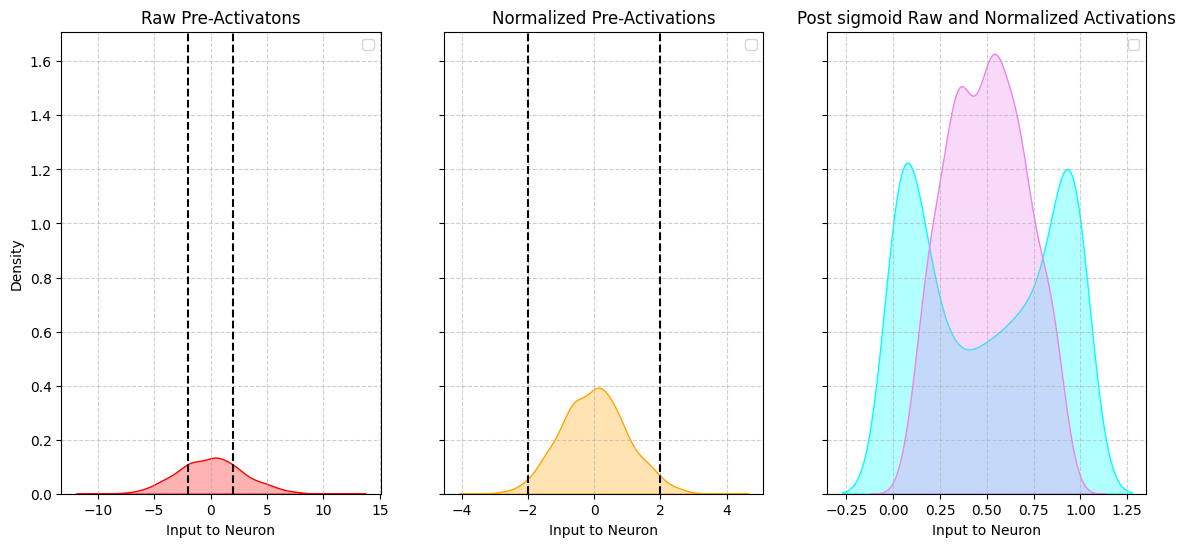

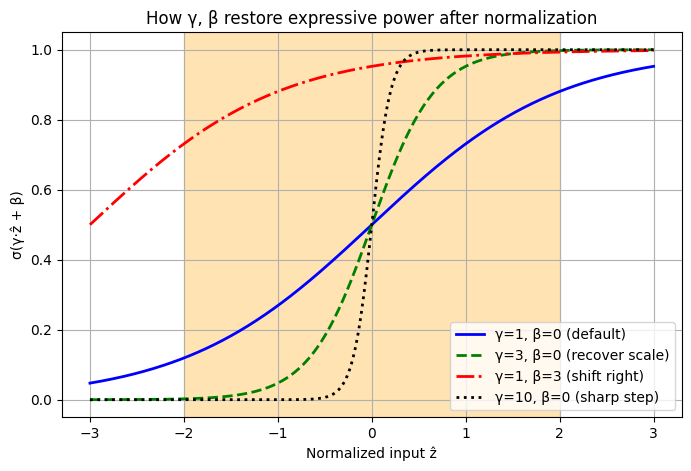

<Figure size 640x480 with 0 Axes>

In [63]:
#Visualizing the raw and normalized form as well as the sigmoid
import seaborn as sns

np.random.seed(42)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

raw_data =  np.random.randn(1000) * 3 + 0
mean = np.mean(raw_data)
std = np.std(raw_data)

norm_data =  (raw_data - mean) / std

fig, axes = plt.subplots(1, 3, figsize = (14, 6), sharey = True)
color = sns.color_palette("viridis")

#Post-sigmoid
raw_sigmoid = sigmoid(raw_data)
norm_sigmoid = sigmoid(norm_data)

sns.kdeplot(raw_data, ax = axes[0], color = 'red', fill = True, alpha = 0.3)
sns.kdeplot()
sns.kdeplot(norm_data, ax = axes[1], color = 'orange', fill = True, alpha = 0.3)

axes[0].grid(True, linestyle = "--", alpha = 0.6)
axes[0].set_title("Raw Pre-Activatons")
axes[0].set_xlabel("Input to Neuron")
axes[0].legend()

axes[0].axvline(-2, color='k', linestyle='--')
axes[0].axvline(2, color='k', linestyle='--')

axes[1].set_title("Normalized Pre-Activations")
axes[1].set_xlabel("Input to Neuron")
axes[1].grid(True,  linestyle = "--",alpha = 0.6)
axes[1].legend()


axes[1].axvline(-2, color='k', linestyle='--')
axes[1].axvline(2, color='k', linestyle='--')

sns.kdeplot(raw_sigmoid, ax = axes[2], color = "cyan", alpha = 0.3, fill = True)
sns.kdeplot(norm_sigmoid, ax = axes[2], color = "violet", alpha = 0.3, fill = True)
axes[2].set_title("Post sigmoid Raw and Normalized Activations")
axes[2].set_xlabel("Input to Neuron")
axes[2].grid(True, linestyle = "--", alpha = 0.6)
axes[2].legend()

norm_clipped = np.linspace(-3, 3, 400)
plt.figure(figsize=(8, 5))
for gamma, beta, style, label in [
    (1, 0, 'b-', 'γ=1, β=0 (default)'),
    (3, 0, 'g--', 'γ=3, β=0 (recover scale)'),
    (1, 3, 'r-.', 'γ=1, β=3 (shift right)'),
    (10, 0, 'k:', 'γ=10, β=0 (sharp step)')
]:
    z_out = gamma * norm_clipped + beta
    plt.plot(norm_clipped, 1 / (1 + np.exp(-z_out)), style, label=label, linewidth=2)

plt.title('How γ, β restore expressive power after normalization')
plt.axvspan(-2, 2, fill = True, alpha = 0.3, color = 'orange')
plt.xlabel('Normalized input ẑ')
plt.ylabel('σ(γ·ẑ + β)')
plt.legend()
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()

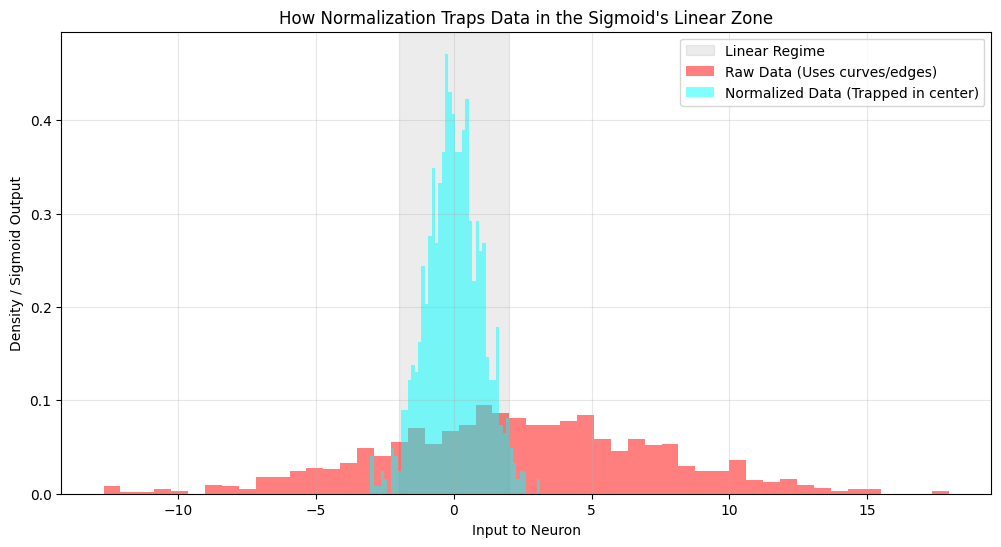

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate data
# 1. Raw data (spread out)
raw_data = np.random.normal(loc=2, scale=5, size=1000)
# 2. Normalized data (Mean 0, Std 1)
norm_data = (raw_data - np.mean(raw_data)) / np.std(raw_data)

# Setup Plot
x_range = np.linspace(-10, 10, 500)
plt.figure(figsize=(12, 6))

# Plot the Sigmoid Curve
# plt.plot(x_range, sigmoid(x_range), color='black', linewidth=2, label='Sigmoid Curve')

# Highlight the "Linear Regime" (approx -2 to 2)
plt.axvspan(-2, 2, color='gray', alpha=0.15, label='Linear Regime')

# Plot Distributions
plt.hist(raw_data, bins=50, density=True, alpha=0.5, color='red', label='Raw Data (Uses curves/edges)')
plt.hist(norm_data, bins=50, density=True, alpha=0.5, color='cyan', label='Normalized Data (Trapped in center)')

plt.title("How Normalization Traps Data in the Sigmoid's Linear Zone")
plt.xlabel("Input to Neuron")
plt.ylabel("Density / Sigmoid Output")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

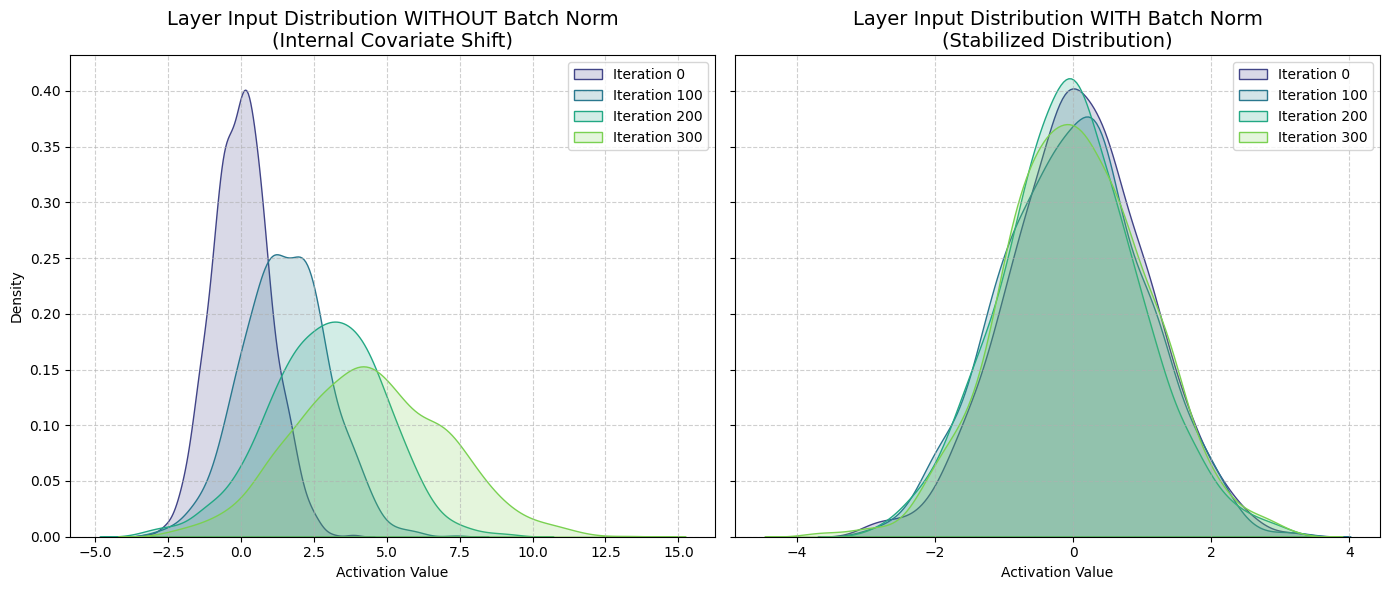

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

def generate_shift_data(steps=5, samples=1000):
    data_no_bn = []
    data_with_bn = []

    for i in range(steps):
        # Simulate internal covariate shift: mean and variance drift over time
        mean_shift = i * 1.5
        std_shift = 1.0 + (i * 0.5)

        # Distributions without BN
        dist_no_bn = np.random.normal(loc=mean_shift, scale=std_shift, size=samples)
        data_no_bn.append(dist_no_bn)

        # Distributions with BN (normalized to mean 0, std 1)
        dist_with_bn = np.random.normal(loc=0, scale=1, size=samples)
        data_with_bn.append(dist_with_bn)

    return data_no_bn, data_with_bn

steps = 4
data_no_bn, data_with_bn = generate_shift_data(steps=steps)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

colors = sns.color_palette("viridis", steps)

# Plot No BN
for i in range(steps):
    sns.kdeplot(data_no_bn[i], ax=axes[0], color=colors[i], label=f'Iteration {i*100}', fill=True, alpha=0.2)
axes[0].set_title('Layer Input Distribution WITHOUT Batch Norm\n(Internal Covariate Shift)', fontsize=14)
axes[0].set_xlabel('Activation Value')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot With BN
for i in range(steps):
    sns.kdeplot(data_with_bn[i], ax=axes[1], color=colors[i], label=f'Iteration {i*100}', fill=True, alpha=0.2)
axes[1].set_title('Layer Input Distribution WITH Batch Norm\n(Stabilized Distribution)', fontsize=14)
axes[1].set_xlabel('Activation Value')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('internal_covariate_shift.png')

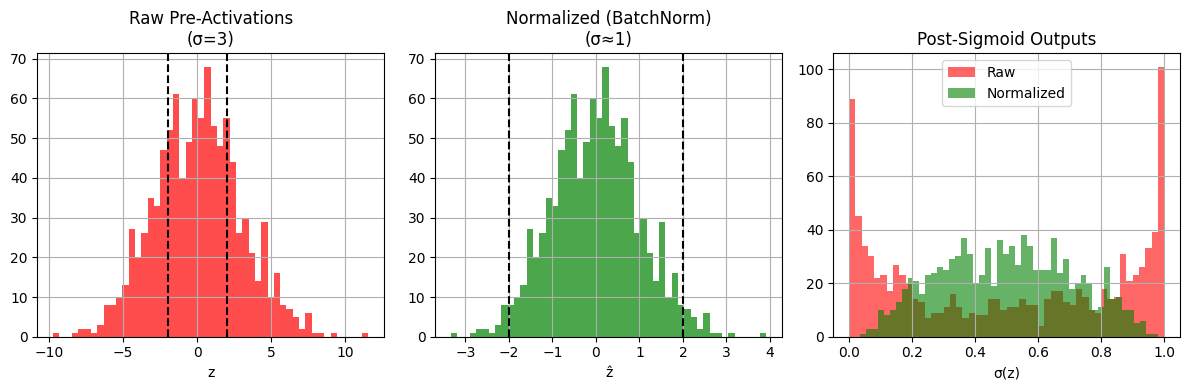

In [20]:
# Simulate pre-sigmoid activations from a poorly initialized network
np.random.seed(42)
z_raw = np.random.randn(1000) * 3 + 0   # mean=0, std=3 → wide spread

# Apply batch normalization (per-dim, but here 1D case)
mu = z_raw.mean()
sigma = z_raw.std()
z_norm = (z_raw - mu) / sigma           # now ≈ N(0,1)

# Plot histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(z_raw, bins=50, alpha=0.7, color='red')
plt.title('Raw Pre-Activations\n(σ=3)')
plt.xlabel('z')
plt.axvline(-2, color='k', linestyle='--')
plt.axvline(2, color='k', linestyle='--')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(z_norm, bins=50, alpha=0.7, color='green')
plt.title('Normalized (BatchNorm)\n(σ≈1)')
plt.xlabel('ẑ')
plt.axvline(-2, color='k', linestyle='--')
plt.axvline(2, color='k', linestyle='--')
plt.grid(True)

plt.subplot(1, 3, 3)
sigma_raw = 1 / (1 + np.exp(-z_raw))
sigma_norm = 1 / (1 + np.exp(-z_norm))
plt.hist(sigma_raw, bins=50, alpha=0.6, label='Raw', color='red')
plt.hist(sigma_norm, bins=50, alpha=0.6, label='Normalized', color='green')
plt.title('Post-Sigmoid Outputs')
plt.xlabel('σ(z)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()